In [57]:
from src import parse_miami
from src import cm_metrics
from src import calc_cocoa as cc
reload(cc)
reload(cm_metrics)
reload(parse_miami)
from src import new_metric_strat as nms
from src import calc_cm_strategies as ccs

mi_utt_file = './data/all_cm/miami_all.0211'
tw_utt_file = './data/all_cm/twit_all.0211'
co_utt_file = './data/all_cm/com_all.0211'

data_folder_path = "./data/miami/clean_1208/"
miami_data = parse_miami.load_data(data_folder_path)
# miami_dict = cm_metrics.get_style_metrics_miami(miami_data, write_file=mi_utt_file)
# miami_dict = cm_metrics.get_style_metrics_miami(miami_data)

twitter_all = cm_metrics.parse_twitter("./data/lid_2016/train-dev-test.tsv")
# twitter_style_dict = cm_metrics.get_style_metrics_twitter(twitter_all, write_file=tw_utt_file)
# twitter_style_dict = cm_metrics.get_style_metrics_twitter(twitter_all)

com_data = cc.load_all_data('./src/files_list_fix.txt')
# all_cm_data = cc.get_general_cm_metrics(fix_data)
# all_cm_data = cc.get_general_cm_metrics(fix_data, write_file=co_utt_file)

read all qual tsvs
read all chat jsons
read all lid tsvs


In [84]:
reload(ccs)

goldfile = './data/all_cm/EA-CJ_annot_0225_joint.csv'
gold_dict = ccs.get_gold_annot(goldfile)
gold_info = ccs.gold_to_info(gold_dict, miami_data, twitter_all, com_data)
print len(gold_dict), len(gold_info)
# print gold_info['mi_sastre10_JEN_849']
# print gold_info['tw_722159441727119365']

150 150


DEBUG STRAT: eg
es i have un amigo que is business and working in the theater . and you ?
n Really ? #dog #huge at an apartment building ?? ?? #crazy #notcool #loco get a house ! http://t.co/00apo6zDF8
es I miss being able to tlk to you and trust you en todo . And now its like nothing ever happened !
se mas amigos work at the office
n i love estudiar mathematics
es @LUVBBW Wooohooo finally a store in La isla del encanto , Puerto Rico !! !
TOTAL UNEVEN 22
PRF (0.8414640522875817, 0.78, 0.7675940709617182, None)
ACC 0.78


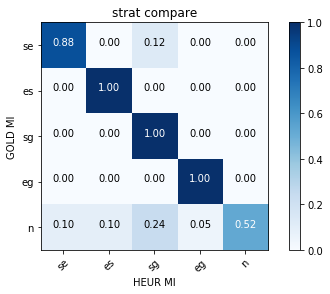

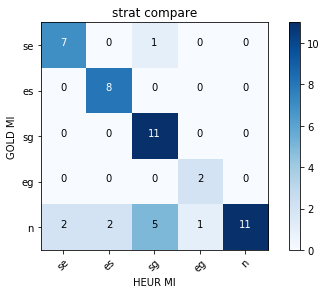

PRF (0.6552380952380952, 0.64, 0.6447619047619049, None)
ACC 0.64


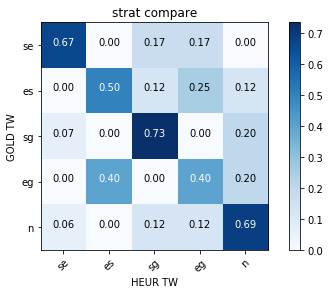

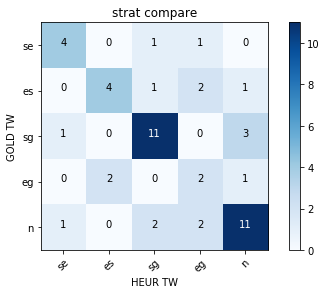

PRF (0.7535, 0.78, 0.7552060543515651, None)
ACC 0.78


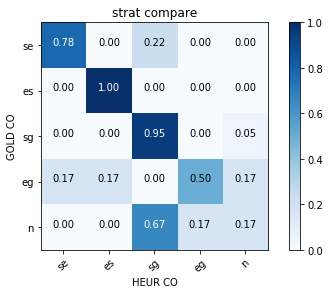

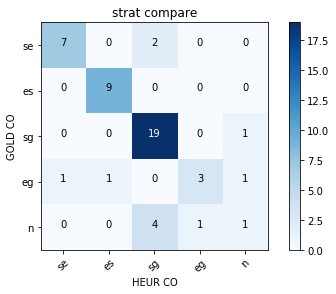

PRF (0.7383112910481332, 0.7333333333333333, 0.7269748377941218, None)
ACC 0.7333333333333333


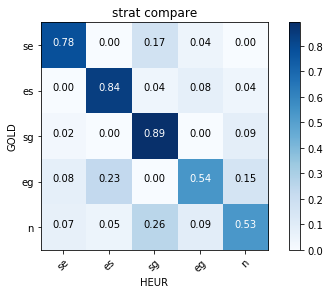

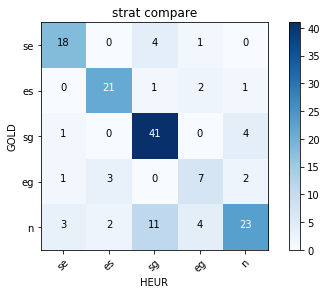

In [145]:
reload(ccs)
reload(nms)
reload(cm_metrics)

ccs.info_to_strategy(gold_dict, gold_info)

COHEN 0.7493619489559165
PRF (0.815593083387201, 0.8, 0.8006065359477125, None)
ACC 0.8


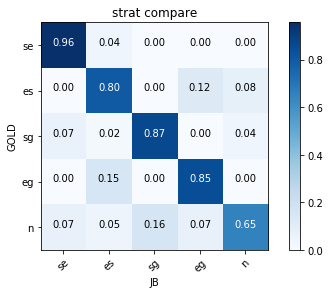

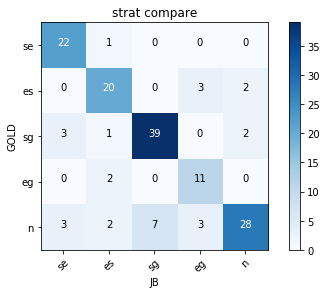

In [141]:
reload(ccs)
jb_file = './data/all_cm/EA-CJ-JB_annot_0301_joint.csv'
ccs.check_JB(jb_file, gold_dict)

In [142]:
reload(cm_metrics)
reload(nms)
miami_dict = cm_metrics.get_style_metrics_miami(miami_data)


c-0	25.68
c-1	8.97
neither	37.52
s-0	15.65
s-1	12.18


In [143]:
reload(cm_metrics)
reload(nms)
twitter_style_dict = cm_metrics.get_style_metrics_twitter(twitter_all)

num CM utt: 12342
num total : 32651
percent CM: 0.377997611099
c-0	30.10
c-1	5.53
neither	41.94
s-0	10.45
s-1	11.98


In [146]:
reload(cc)
fix_style2chat_dict = cc.get_style2chat(com_data)
fix_style_data = {}
for style, chat_list in fix_style2chat_dict.iteritems():
    fix_style_data[style] = cc.get_general_cm_metrics(com_data, param_chat_list=chat_list)
print 'DONE collecting CM metrics into fix_style_data'

trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']
DONE collecting CM metrics into fix_style_data


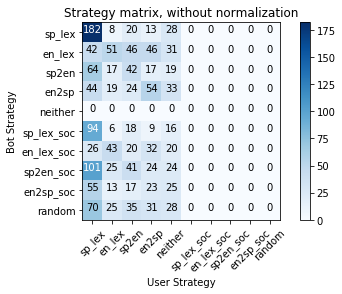

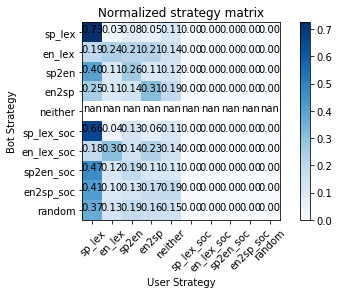

In [148]:
reload(cc)
# cc.viz_general(fix_style_data)
cc.viz_cm_style(fix_style_data)

In [134]:
fix_style_data.keys()

[u'sp_lex_soc',
 u'sp2en',
 u'sp2en_soc',
 u'random',
 u'en_mono',
 u'sp_lex',
 u'en2sp_soc',
 u'sp_mono',
 u'en_lex',
 u'en_lex_soc',
 u'en2sp']

In [138]:
all_cm_data = cc.get_general_cm_metrics(com_data)

using all chat ids
trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']


In [139]:
# does M/I affect Success?
# does ENTRAINMENT affect Success?
reload(cc)
print 'FIX LID (partial)'
no_mono_chats = []
for botstyle, chatlist in fix_style2chat_dict.iteritems():
    if 'mono' in botstyle:
        print botstyle
        continue
    no_mono_chats.extend(chatlist)
# cc.pearsons_cm_success(fix_data, cm_data=all_cm_data)
cc.pearsons_cm_success(com_data, cm_data=all_cm_data, filter_chatlist=no_mono_chats)

FIX LID (partial)
en_mono
sp_mono
NUM CHATS USED: 487

N07_TECH
	entrain	-0.0301	0.5077
	social	-0.0040	0.9290
	m-idx	-0.0336	0.4593
	i-idx	-0.0310	0.4945
N01_I_UNDERSTAND
	entrain	0.0842	0.0633
	social	0.0169	0.7103
	m-idx	0.2200	0.0000
	i-idx	0.2050	0.0000
N04_UNDERSTAND_ME
	entrain	0.0412	0.3647
	social	0.0428	0.3459
	m-idx	0.0201	0.6577
	i-idx	-0.0102	0.8226
N03_HUMAN
	entrain	0.0407	0.3701
	social	0.0638	0.1595
	m-idx	0.0741	0.1023
	i-idx	0.0395	0.3843
N05_CHAT
	entrain	0.0088	0.8462
	social	-0.0139	0.7604
	m-idx	-0.0007	0.9877
	i-idx	0.0001	0.9983
N06_TEXTS
	entrain	0.0711	0.1171
	social	0.0527	0.2457
	m-idx	-0.0670	0.1396
	i-idx	-0.0656	0.1485
N02_COOPERATIVE
	entrain	-0.0052	0.9096
	social	0.0087	0.8485
	m-idx	0.0539	0.2353
	i-idx	0.0284	0.5320
BIN_SUCCESS
	entrain	0.0121	0.7902
	social	-0.0262	0.5638
	m-idx	-0.0416	0.3601
	i-idx	-0.0226	0.6195
NUM_TURN
	entrain	0.0058	0.8983
	social	0.0525	0.2472
	m-idx	0.2355	0.0000
	i-idx	0.1324	0.0034


In [151]:
from src import subset_users as su
reload(su)

ctr = 0
workers = set()
infile = 'cocoa/eval/all_qual_0926.tsv' # 296 uniq and valid
# infile = 'cocoa/eval/all_qual_firsttime_0926.tsv' # 289 valid, so 7 users gave no text on 1st try
with open(infile, 'r') as f:
    with open('cocoa/eval/all_qual_unique_1031.tsv', 'w') as w:
        for line in f.readlines():
            if cc.is_valid_chat(com_data, line.split()[0]):
                worker = line.split()[1]
                if worker in workers:
                    continue
                workers.add(worker)
#                 w.write(line)
                ctr += 1
print ctr

first_data = su.read_qual_file('cocoa/eval/all_qual_firsttime_0926.tsv')

uniq_workers = workers
uniq_first_data = {}
# added 02/18/19
for first_chatid, item in first_data.iteritems():
    if item['worker_id'] in uniq_workers:
        uniq_first_data[first_chatid] = item
        
first_data = uniq_first_data

first_chatids = first_data.keys()
# spa_country_workerids, region_dict_full = su.split_country(first_data)
# spa_country_chatids = su.get_chats_from_workers(spa_country_workerids, fix_data)
print len(first_data)
print(len(first_chatids))

296
295
295


In [152]:
fix_data = com_data
spa_abil_high, spa_abil_low = su.split_lang_ability(first_data, lang='spa', score_thresh=4)
spa_high_chatids = su.get_chats_from_workers(spa_abil_high, fix_data)
spa_low_chatids = su.get_chats_from_workers(spa_abil_low, fix_data)
print 'SPANISH'
print 'high', len(spa_high_chatids)
print 'low', len(spa_low_chatids)

eng_abil_high, eng_abil_low = su.split_lang_ability(first_data, lang='eng', score_thresh=4)
eng_high_chatids = su.get_chats_from_workers(eng_abil_high, fix_data)
eng_low_chatids = su.get_chats_from_workers(eng_abil_low, fix_data)
print '\nENGLISH'
print 'high', len(eng_high_chatids)
print 'low', len(eng_low_chatids)

eng_dom = [i for i in eng_abil_high if i in spa_abil_low]
spa_dom = [i for i in spa_abil_high if i in eng_abil_low]
both_dom = [i for i in spa_abil_high if i in eng_abil_high]
eng_dom_chatids = su.get_chats_from_workers(eng_dom, fix_data)
spa_dom_chatids = su.get_chats_from_workers(spa_dom, fix_data)
both_dom_chatids = su.get_chats_from_workers(both_dom, fix_data)
print '\neng_dom: {} chatids, {} users'.format(len(eng_dom_chatids), len(eng_dom))
print 'spa_dom: {} chatids, {} users'.format(len(spa_dom_chatids), len(spa_dom))
print 'both_dom: {} chatids, {} users'.format(len(both_dom_chatids), len(both_dom))

SPANISH
high 448
low 150

ENGLISH
high 536
low 62

eng_dom: 133 chatids, 67 users
spa_dom: 45 chatids, 25 users
both_dom: 403 chatids, 195 users


DONE collecting CM metrics into all_data


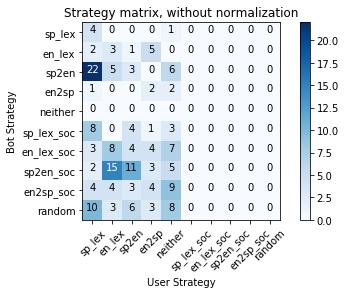

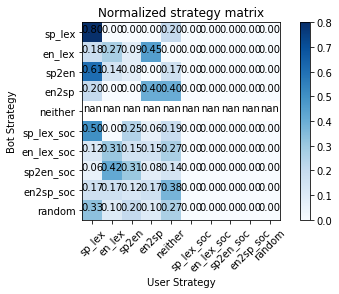

DONE collecting CM metrics into all_data


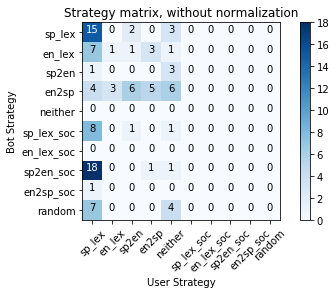

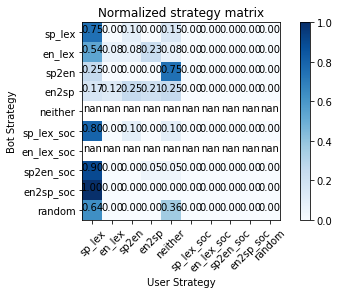

trimming end ['no', 'i', 'do', 'nt', 'have', 'a', 'friend', 'quien', 'trabaja', 'en', '', 'el', 'banco', '']
DONE collecting CM metrics into all_data


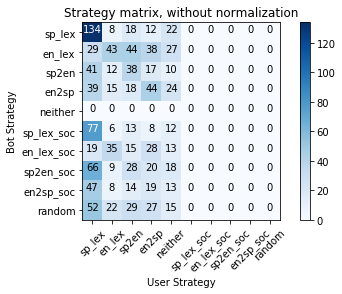

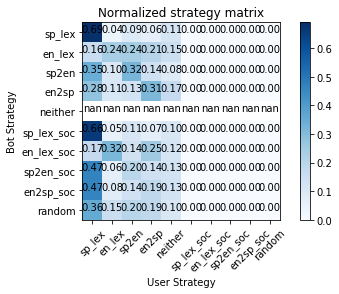

In [153]:
for chatids in [eng_dom_chatids, spa_dom_chatids, both_dom_chatids]:
    ability_styles = {}
    for style, chat_list in fix_style2chat_dict.iteritems():
        new_chat_list = [chatid for chatid in chat_list if chatid in chatids]
        ability_styles[style] = cc.get_general_cm_metrics(fix_data, param_chat_list=new_chat_list)
    print 'DONE collecting CM metrics into all_data'
    cc.viz_cm_style(ability_styles)